Practice 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_excel('practice_dataframe.xlsx', usecols=['cat5_customerSatisfaction', 'cat1_gender', 'num1_10', 'num2_10', 'num3_10'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
cat1_gender                  982 non-null object
cat5_customerSatisfaction    981 non-null object
num1_10                      1000 non-null float64
num2_10                      952 non-null float64
num3_10                      970 non-null object
dtypes: float64(2), object(3)
memory usage: 27.4+ KB


In [4]:
data.head()

,cat1_gender,cat5_customerSatisfaction,num1_10,num2_10,num3_10
0,male,good,1952.951114,-14.984191,
1,male,Good,248.952820,15.251861,624.089
2,male,Good,465.578792,72.069553,-
3,NaN,Very good,746.798307,-61.282697,702.582
4,male,Very good,-92.649660,11.401243,738.488


Задание №1

<AxesSubplot:ylabel='cat1_gender'>

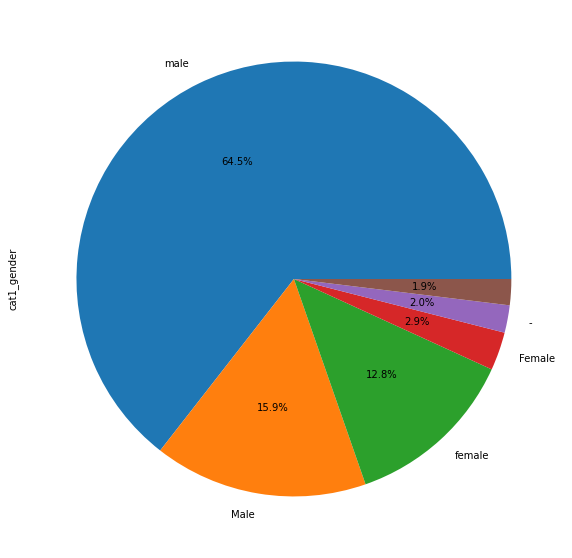

In [5]:
plt.figure(figsize=(10, 10))
data['cat1_gender'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:>

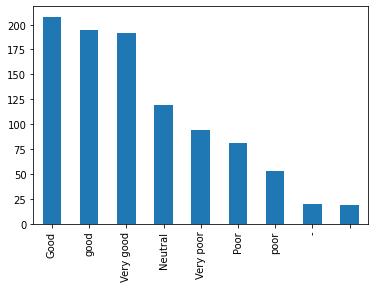

In [6]:
data['cat5_customerSatisfaction'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

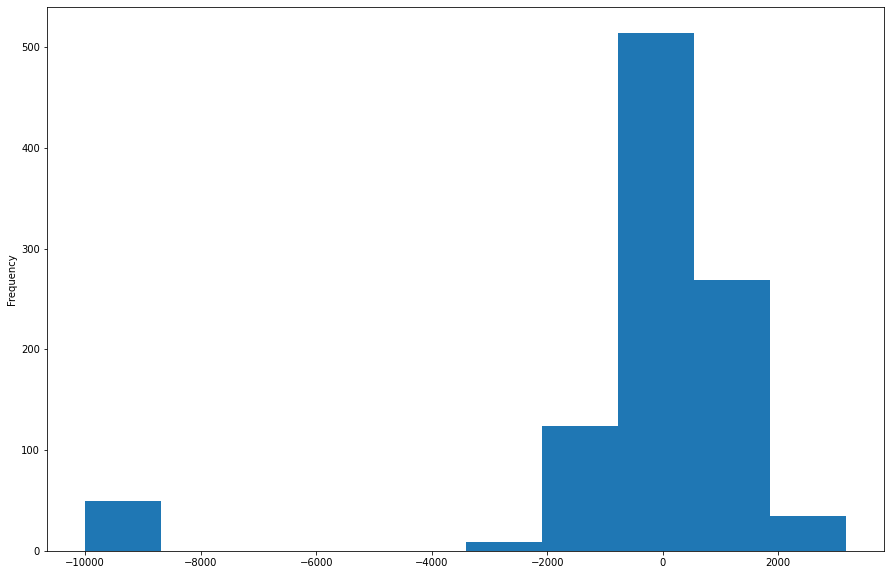

In [7]:
plt.figure(figsize=(15, 10))
data['num1_10'].plot.hist()

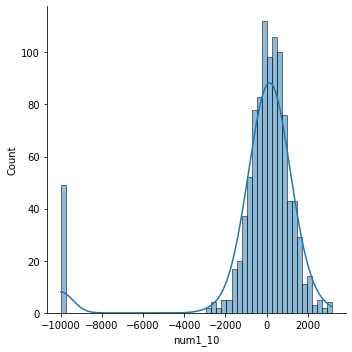

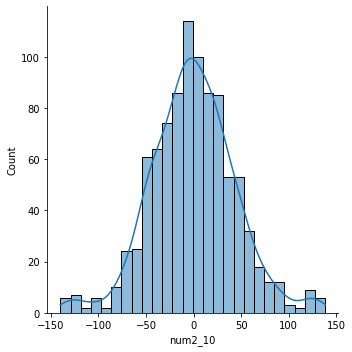

In [8]:
sns.displot(data=data, x='num1_10', kde=True);
sns.displot(data=data, x='num2_10', kde=True);

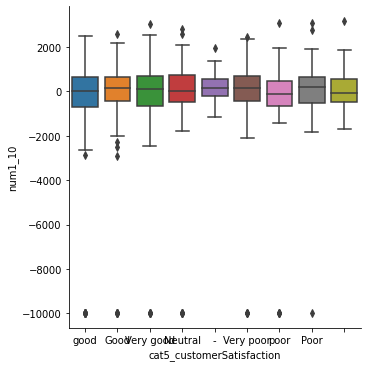

In [9]:
sns.catplot(data=data,
            x='cat5_customerSatisfaction',
            y='num1_10',
            kind='box');

Задание № 2

In [10]:
data['cat1_gender'] = data['cat1_gender'].replace(('-', ' ', ''), np.nan).replace('male', 'Male').replace('female', 'Female')

<AxesSubplot:ylabel='cat1_gender'>

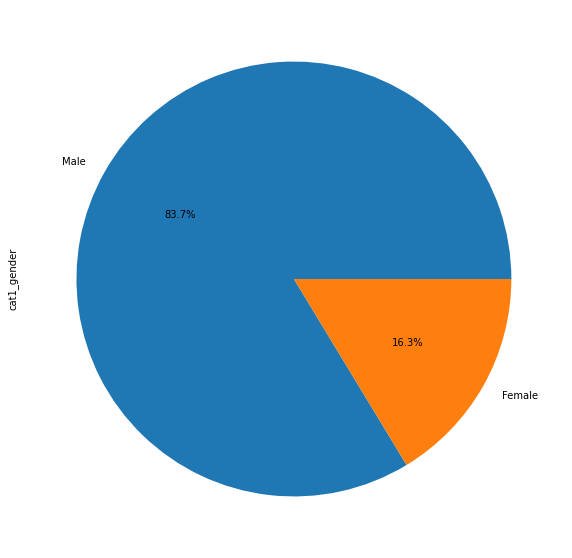

In [11]:
plt.figure(figsize=(10, 10))
data['cat1_gender'].value_counts().plot.pie(autopct='%1.1f%%')

In [12]:
data['cat5_customerSatisfaction'].unique()

array(['good', 'Good', 'Very good', 'Neutral', '-', 'Very poor', 'poor',
       'Poor', ' ', nan], dtype=object)

<AxesSubplot:ylabel='cat5_customerSatisfaction'>

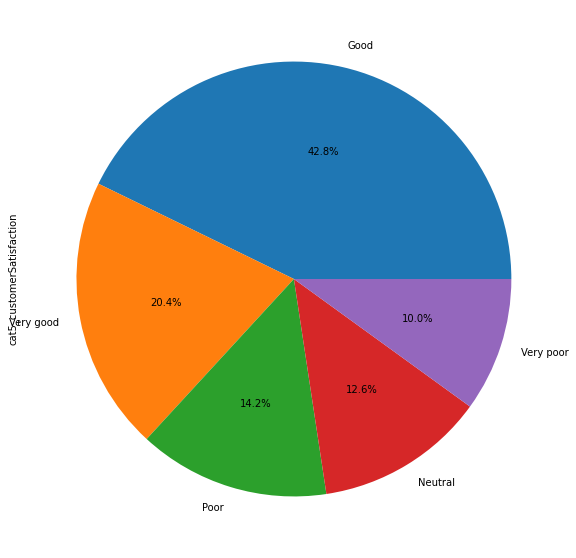

In [13]:
data['cat5_customerSatisfaction'] = data['cat5_customerSatisfaction'].replace('good', 'Good').replace('poor', 'Poor').replace(('-', 'nan', ' '), np.nan)
plt.figure(figsize=(10, 10))
data['cat5_customerSatisfaction'].value_counts().plot.pie(autopct='%1.1f%%')

In [14]:
data.num3_10 = data.num3_10.replace(('-', ' '), np.nan)

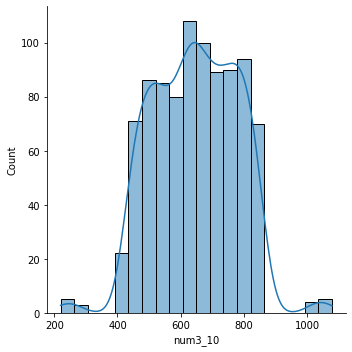

In [15]:
sns.displot(data=data, x='num3_10', kde=True);

Задание №3

-0.8743873370640093 1.2951662717517378


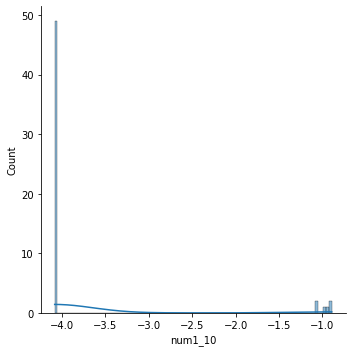

In [16]:
from scipy.stats import sigmaclip
from sklearn import preprocessing
data.num1_10 = preprocessing.scale(data.num1_10)
data.num2_10 = preprocessing.scale(data.num2_10)
data.num3_10 = preprocessing.scale(data.num3_10)
c1, low, upp = sigmaclip(data['num1_10'], 3.0, 3.0)
print(low, upp)
c_garbage = data['num1_10'][data['num1_10'] >= upp]
c_garbage = data['num1_10'][data['num1_10'] <= low]
sns.displot(data=c_garbage,
            kde=True,
            bins=100);
data_columns = data.columns.values
data_where = (data['num1_10'] <= upp) & (data['num1_10'] >= low)
data_truth = data.where(data_where).dropna(how="all").values
data = pd.DataFrame(data_truth, columns = data_columns)

Задание №4

In [17]:
customerSatisfaction = data.cat5_customerSatisfaction.mode()
data.cat5_customerSatisfaction = data.cat5_customerSatisfaction.fillna(customerSatisfaction[0])
data.cat5_customerSatisfaction.isnull().any()


False

In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
data['cat1_gender'] = data['cat1_gender'].replace(np.nan, ' ')
onehot_encoder.fit(data[['cat1_gender']])
enc_df = pd.DataFrame(onehot_encoder.transform(data[['cat1_gender']]).toarray())
enc_df[1] = np.where(enc_df[0] == 1, np.nan, enc_df[1])
enc_df[2] = np.where(enc_df[0] == 1, np.nan, enc_df[2])
enc_df[3] = data.num1_10

knn_imputer = KNNImputer()
enc_df = pd.DataFrame(knn_imputer.fit_transform(enc_df))

# Оставляем нулевой столбец т.к. inverse_transform требует равное количество аргументов как и при transform
enc_df[1] = np.where(enc_df[1] >= enc_df[2], 1, 0)
enc_df[2] = np.where(enc_df[2] >= enc_df[1], 1, 0)
enc_df[0] = 0
data['cat1_gender'] = onehot_encoder.inverse_transform(enc_df.iloc[:, :3])
data.cat1_gender.isnull().any()

False

In [19]:
print(pd.DataFrame(knn_imputer.fit_transform(data.iloc[:, 2:])))
data.num3_10 = pd.DataFrame(knn_imputer.fit_transform(data.iloc[:, 2:]))[2]

            0         1         2
0    0.974216 -0.330333  0.325738
1    0.252830  0.355289 -0.169796
2    0.344538  1.643665 -0.357874
3    0.463592 -1.380180  0.424979
4    0.108213  0.267973  0.697051
..        ...       ...       ...
934 -0.377110  1.124539  0.628517
935  0.014801  2.940071 -0.110365
936  0.527931  0.082849 -0.255653
937 -0.057519  0.542021 -1.214927
938  0.166851  2.008848 -0.366882

[939 rows x 3 columns]


In [20]:
num1_mean = data.num1_10.mean()
data.num1_10 = data.num1_10.fillna(num1_mean)

False


,cat1_gender,cat5_customerSatisfaction,num1_10,num2_10,num3_10
0,Male,Good,0.974216,-0.330333,0.325738
1,Male,Good,0.252830,0.355289,-0.169796
2,Male,Good,0.344538,1.643665,-0.357874
3,Male,Very good,0.463592,-1.380180,0.424979
4,Male,Very good,0.108213,0.267973,0.697051
...,...,...,...,...,...
933,Male,Very poor,0.147596,-1.519303,-0.272142
934,Male,Neutral,-0.377110,1.124539,0.628517
936,Male,Poor,0.527931,0.082849,-0.255653
937,Male,Good,-0.057519,0.542021,-1.214927


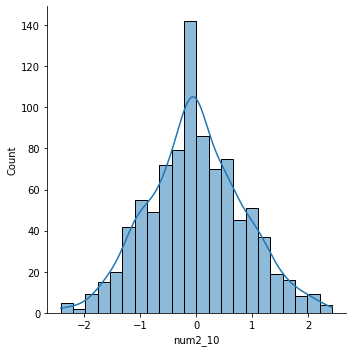

In [21]:
num2_median = data.num2_10.median()
data.num2_10 = data.num2_10.fillna(num2_median)
print(data.num2_10.isnull().any())

# Задание 3 на 2й количественный метод
c1, low, upp = sigmaclip(data['num2_10'], 3.0, 3.0)
data_where = (data['num2_10'] <= upp) & (data['num2_10'] >= low)
data_truth = data.where(data_where).dropna(how="all")
data = data_truth
sns.displot(data=data.num2_10, kde=True);
data

In [22]:
#Метод квартилей
def quantile_method(data, check = True):
    data_exp = data.sort_values()
    m_e = data_exp.quantile(0.5)
    q1 = data_exp.quantile(0.25)
    q3 = data_exp.quantile(0.75)
    between_quantile_arg = q3 - q1
    inside_range = np.array([q1 - 1.5 * between_quantile_arg, q3 + 1.5 * between_quantile_arg])
    outside_range = np.array([q1 - 3.0 * between_quantile_arg, q3 + 3.0 * between_quantile_arg])
    if check:
        data_exp = data_exp[data_exp >= outside_range[0]]
        data_exp = data_exp[data_exp <= outside_range[1]]
    else:
        data_exp = data_exp[data_exp >= inside_range[0]]
        data_exp = data_exp[data_exp <= inside_range[1]]
    return data_exp, inside_range, outside_range


-2.694654023437403 2.642333118967789
[-2.98800307  2.92721101]


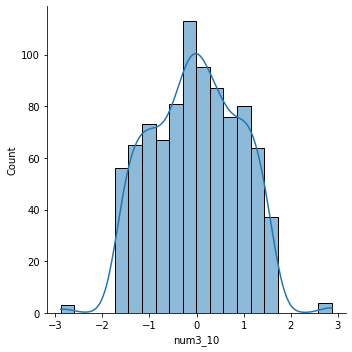

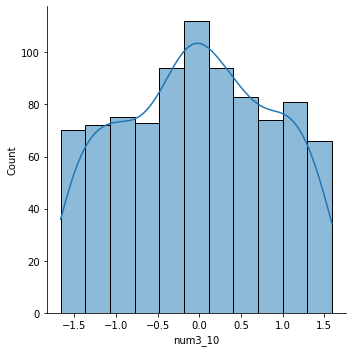

In [23]:
# Продолжение задания №3
c1, low, upp = sigmaclip(data['num3_10'], 3.0, 3.0)
print(low, upp)
# Применение
c2, ins, out = quantile_method(data['num3_10'], False)
sns.displot(data=c2, kde=True);
print(ins)
# Делаем вывод, что метод сигм эффективнее
data_where = (data['num3_10'] <= upp) & (data['num3_10'] >= low)
data_truth = data.where(data_where).dropna(how="all")
data = data_truth

sns.displot(data=data.num3_10, kde=True);




Задание №5

In [24]:
data.num1_10 = preprocessing.normalize([data.num1_10])[0]
data.num2_10 = preprocessing.normalize([data.num2_10])[0]
data.num3_10 = preprocessing.normalize([data.num3_10])[0]

{0: 'Good', 1: 'Neutral', 2: 'Poor', 3: 'Very good', 4: 'Very poor'}


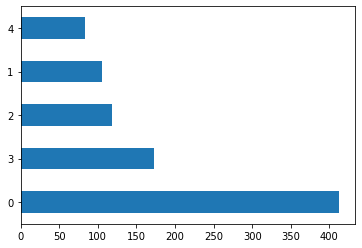

In [25]:
label_encoder = LabelEncoder()
customerSatisfaction = pd.Series(label_encoder.fit_transform(data['cat5_customerSatisfaction']))
customerSatisfaction.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))


In [26]:
data.isnull().any().any()

False